# Black Friday Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
bf = pd.read_csv('black_friday.csv', names=['dollar_spent'])
bf.head()

dollar_spent
0          8370
1         15200
2          1422
3          1057
4          7969

## Visualisasi Data

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000217E8F43F28>]],
      dtype=object)

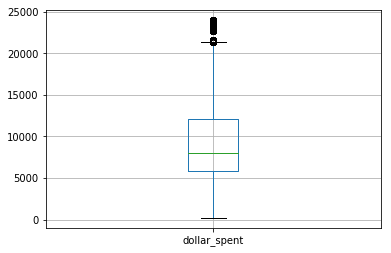

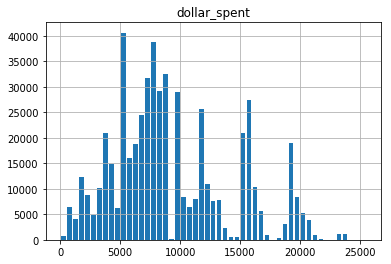

In [3]:
bf.boxplot()
bf.hist(bins=[x for x in range(0, 26000, 500)], rwidth=0.8)

## Deskripsi Statistik

In [4]:
print('Minimum value      :',bf.min()['dollar_spent'])
print('Maximum value      :',bf.max()['dollar_spent'])
print('Mean value         :',bf.mean()['dollar_spent'])
print('Mode value         :',bf.mode()['dollar_spent'][0])
print('Median value       :',bf.median()['dollar_spent'])

Minimum value      : 185
Maximum value      : 23961
Mean value         : 9333.859852635065
Mode value         : 6855
Median value       : 8062.0


In [5]:
print('Variance           :',bf.var()['dollar_spent'])
print('Standard deviation :',bf.std()['dollar_spent'])
print('Skewness           :',bf.skew()['dollar_spent'])
print('Kurtosis           :',bf.kurt()['dollar_spent'])

Variance           : 24810581.48601374
Standard deviation : 4981.022132656483
Skewness           : 0.6242797316083074
Kurtosis           : -0.34312137256836284


## Menentukan Fungsi Densitas Probabilitas

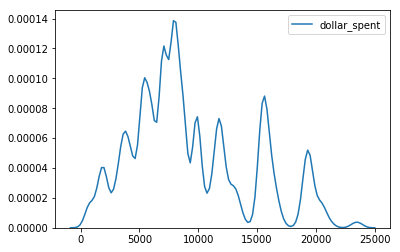

In [6]:
import seaborn as sns
from scipy import stats

sns.kdeplot(bf['dollar_spent'])

In [7]:
# Nilai minimum dari dataset
minimum_x = bf.min()['dollar_spent']
print('Nilai minimum dollar_spent\t:', minimum_x)

# Nilai maksimum dari dataset
maximum_x = bf.max()['dollar_spent']
print('Nilai maksimum dollar_spent\t:', maximum_x)

Nilai minimum dollar_spent	: 185
Nilai maksimum dollar_spent	: 23961


Karena data yang digunakan adalah diskrit, lalu memerhatikan bahwa nilai terkecil untuk *dollar_spent* adalah 185, maka dapat langsung disimpulkan bahwa fungsi densitas probabilitas yang digunakan adalah
\begin{equation*}
F(x) = P(X \leq x)   = \sum_{k=185}^x P(X = k)
\end{equation*}
Di mana F(x) adalah fungsi densitas probabilitas, yaitu kumulatif fungsi probabilitas untuk X lebih kecil atau sama dengan dari x, sedangkan P(X = k) adalah fungsi probabilitas untuk X bernilai k yang didefinisikan sebagai
\begin{equation*}
P(X = k)   = \frac{n_{X=k}}{n_{total}}
\end{equation*}

In [8]:
n_total = bf['dollar_spent'].count()

# Implementasi fungsi PDF secara harafiah
def prob(k):
    n_x_equals_k = bf.loc[bf['dollar_spent'] == k]['dollar_spent'].count()
    return float(n_x_equals_k / n_total)

def pdf(x):
    res = float(0)
    for i in range(minimum_x, x+1, 1):
        res += prob(i)
    return res

# Implementasi fungsi PDF yang lebih mangkus
def pdf_improved(k):
    n_x_less_than_or_equals_k = bf.loc[bf['dollar_spent'] <= k]['dollar_spent'].count()
    return float(n_x_less_than_or_equals_k / n_total)

## Pertanyaan Spesifik Dataset

1. Jika terdapat 250 orang pembeli baru yang mengikuti Black Friday, tentukan ekspektasi jumlah orang yang:
    1. Miskin (total pembelian kurang dari 1000 dolar)
    2. Kaya (total pembelian lebih dari 10000 dolar)
    3. Crazy Rich (total pembelian lebih dari 20000 dolar)

In [9]:
pembeli_baru = 250

# a. Ekspektasi jumlah pembeli miskin dari 250 pembeli baru yaitu membeli kurang dari 1000 dollar
pembeli_miskin = int(pembeli_baru * pdf_improved(1000-1))
print('a. Ekspektasi jumlah pembeli miskin dari 250 pembeli baru\t:', pembeli_miskin)

# b. Ekspektasi jumlah pembeli kaya dari 250 pembeli baru yaitu membeli lebih dari 10000 dollar
pembeli_kaya = int(pembeli_baru * (1 - pdf_improved(10000)))
print('b. Ekspektasi jumlah pembeli kaya dari 250 pembeli baru\t\t:', pembeli_kaya)

# c. Ekspektasi jumlah pembeli miskin dari 250 pembeli baru yaitu membeli lebih dari 20000 dollar
pembeli_crazy_rich = int(pembeli_baru * (1 - pdf_improved(20000)))
print('c. Ekspektasi jumlah pembeli crazy rich dari 250 pembeli baru\t:', pembeli_crazy_rich)

a. Ekspektasi jumlah pembeli miskin dari 250 pembeli baru	: 3
b. Ekspektasi jumlah pembeli kaya dari 250 pembeli baru		: 86
c. Ekspektasi jumlah pembeli crazy rich dari 250 pembeli baru	: 5


2. Jika terdapat 1000 orang pembeli baru yang mengikuti Black Friday, tentukan ekspektasi jumlah orang yang sebenarnya pengeluarannya sama, seperti membeli:
    1. Galaxy Fold (total pembelian di antara 1980–2000 dolar inklusif)
    2. MacBook Pro 2018 Touch Bar 256GB + iPhone XR + AirPods 2 (total pembelian di antara 2707–2897 dolar inklusif)

In [10]:
pembeli_baru = 1000

# a. Ekspektasi jumlah pembeli dengan pengeluaran sama seperti membeli galaxy fold
pembeli_galaxy_fold = int(pembeli_baru * (pdf_improved(2000) - pdf_improved(1980-1)))
print('a. Ekspektasi jumlah pembeli dengan pengeluaran sama seperti membeli galaxy fold\t:', pembeli_galaxy_fold)

# b. Ekspektasi jumlah pembeli dengan pengeluaran sama seperti membeli macbook pro
pembeli_macbook_pro = int(pembeli_baru * (pdf_improved(2897) - pdf_improved(2707-1)))
print('b. Ekspektasi jumlah pembeli dengan pengeluaran sama seperti membeli macbook pro\t:', pembeli_macbook_pro)

a. Ekspektasi jumlah pembeli dengan pengeluaran sama seperti membeli galaxy fold	: 1
b. Ekspektasi jumlah pembeli dengan pengeluaran sama seperti membeli macbook pro	: 7
